# JSON, XML 실습

---

## JSON?
- JavaScript Object Notation
- human-readable

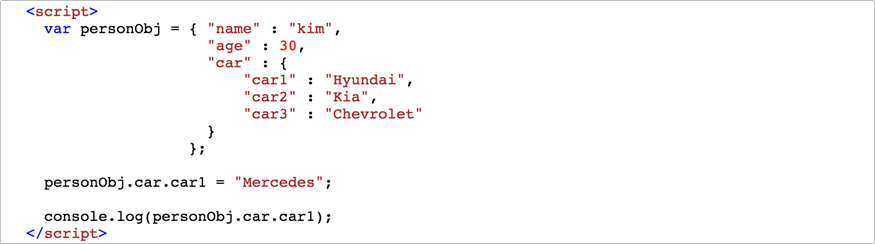

## JSON in Python
- Encoding : 변수는 dumps, 파일은 dump
- Decoding : 변수는 loads, 파일은 load

In [4]:
import json

name = ("Kim", "Lee", "Park")
age = [30, 28, 31]
person = {"name":"Kim", "age":30, "car":False}

In [11]:
nameStr = json.dumps(name)
ageStr = json.dumps(age)
personStr = json.dumps(person, indent="  ") # 들여쓰기도 줄 수 있음
print(nameStr)
print(ageStr)
print(personStr)

["Kim", "Lee", "Park"]
[30, 28, 31]
{
  "name": "Kim",
  "age": 30,
  "car": false
}


In [8]:
kname = ("김", "이", "박")
knameStr = json.dumps(kname) # 한글을 바이트 타입으로 보냄
print(knameStr)

knameStr = json.dumps(kname, ensure_ascii=False) # 한글을 인간이 읽을 수 있게끔 해줌
print(knameStr)

["\uae40", "\uc774", "\ubc15"]
["김", "이", "박"]


In [12]:
personObj = json.loads(personStr)
person == personObj # 둘이 서로 같은 객체임

True

In [13]:
print(personObj)

{'name': 'Kim', 'age': 30, 'car': False}


In [15]:
with open("test.json", "w") as f:
    json.dump(person,f)

In [16]:
with open("test.json", 'r') as f:
    personObj = json.load(f)
print(personObj)

{'name': 'Kim', 'age': 30, 'car': False}


## 주소 열기

In [17]:
import urllib.request

In [19]:
resp = urllib.request.urlopen("https://jsonplaceholder.typicode.com/posts/1")

In [20]:
text = resp.read()

In [21]:
textStr = text.decode("utf-8")

In [22]:
json.loads(textStr)

{'userId': 1,
 'id': 1,
 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}

In [43]:
url ="http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty?serviceKey=ckzCRkQ0HOEcHoV%2BZ5N0fDqDm6Jyp4oTXIZdL5NduqXd%2BbEs%2BZOvsAgOmvuR2YgF5uNI88ARNfA726SEAAAHKA%3D%3D&numOfRows=10&pageSize=10&pageNo=1&startPage=1&stationName=%EC%A2%85%EB%A1%9C%EA%B5%AC&dataTerm=DAILY&ver=1.3&_returnType=json"
resp = urllib.request.urlopen(url)
text = resp.read()
textStr = text.decode("utf-8")
json.loads(textStr)

{'list': [{'_returnType': 'json',
   'coGrade': '1',
   'coValue': '0.3',
   'dataTerm': '',
   'dataTime': '2018-07-13 14:00',
   'khaiGrade': '2',
   'khaiValue': '54',
   'mangName': '도시대기',
   'no2Grade': '1',
   'no2Value': '0.015',
   'numOfRows': '10',
   'o3Grade': '1',
   'o3Value': '0.016',
   'pageNo': '1',
   'pm10Grade': '1',
   'pm10Grade1h': '1',
   'pm10Value': '15',
   'pm10Value24': '22',
   'pm25Grade': '2',
   'pm25Grade1h': '1',
   'pm25Value': '11',
   'pm25Value24': '17',
   'resultCode': '',
   'resultMsg': '',
   'rnum': 0,
   'serviceKey': '',
   'sidoName': '',
   'so2Grade': '',
   'so2Value': '-',
   'stationCode': '',
   'stationName': '',
   'totalCount': '',
   'ver': ''},
  {'_returnType': 'json',
   'coGrade': '1',
   'coValue': '0.3',
   'dataTerm': '',
   'dataTime': '2018-07-13 13:00',
   'khaiGrade': '2',
   'khaiValue': '54',
   'mangName': '도시대기',
   'no2Grade': '1',
   'no2Value': '0.018',
   'numOfRows': '10',
   'o3Grade': '1',
   'o3Value': '

In [79]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote

url = 'http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty' 
queryParams = '?' + urlencode({ quote_plus('ServiceKey') : unquote('9yufdGwfG5nTrm48106s%2B%2FQK%2Bz6byu8kQyqGYX7ywOTcSZz5hKnJG6OSAFPymm3Ei6TrKcsL3Osas1zm4v6HmA%3D%3D'), 
                               quote_plus('numOfRows') : '10', 
                               quote_plus('pageSize') : '10',
                               quote_plus('pageNo') : '1',
                               quote_plus('startPage') : '1',
                               quote_plus('sidoName') : '서울', 
                               quote_plus('ver') : '1.3',
                               quote_plus('_returnType') : 'json'})
# 위의 service key가 보내는 결과는 달라짐. 이는 byte code로 되어있는 key를 다시 byte code로 바꾸는 것이 된다
request = Request(url + queryParams)
request.get_method = lambda: 'GET'
response_body = urlopen(request).read()
print(response_body)

b'{"list":[{"_returnType":"json","coGrade":"1","coValue":"0.3","dataTerm":"","dataTime":"2018-07-13 15:00","khaiGrade":"1","khaiValue":"43","mangName":"\xeb\x8f\x84\xec\x8b\x9c\xeb\x8c\x80\xea\xb8\xb0","no2Grade":"1","no2Value":"0.015","numOfRows":"10","o3Grade":"1","o3Value":"0.024","pageNo":"1","pm10Grade":"1","pm10Grade1h":"1","pm10Value":"17","pm10Value24":"21","pm25Grade":"1","pm25Grade1h":"1","pm25Value":"10","pm25Value24":"13","resultCode":"","resultMsg":"","rnum":0,"serviceKey":"","sidoName":"","so2Grade":"1","so2Value":"0.003","stationCode":"","stationName":"\xec\xa4\x91\xea\xb5\xac","totalCount":"","ver":""},{"_returnType":"json","coGrade":"1","coValue":"0.5","dataTerm":"","dataTime":"2018-07-13 15:00","khaiGrade":"2","khaiValue":"53","mangName":"\xeb\x8f\x84\xeb\xa1\x9c\xeb\xb3\x80\xeb\x8c\x80\xea\xb8\xb0","no2Grade":"1","no2Value":"0.027","numOfRows":"10","o3Grade":"1","o3Value":"0.019","pageNo":"1","pm10Grade":"2","pm10Grade1h":"1","pm10Value":"28","pm10Value24":"33","pm25

In [157]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote

url = 'http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty' 

params = {'ServiceKey' : unquote('9yufdGwfG5nTrm48106s%2B%2FQK%2Bz6byu8kQyqGYX7ywOTcSZz5hKnJG6OSAFPymm3Ei6TrKcsL3Osas1zm4v6HmA%3D%3D'), 
                               'numOfRows' : '10', 
                               'pageSize' : '10',
                               'pageNo' : '1',
                               'startPage' : '1',
                               'sidoName' : '서울', 
                               'ver' : '1.3',
                               '_returnType' : 'json'}
params = urlencode(params)
params = params.encode("utf-8")

# 위의 service key가 보내는 결과는 달라짐. 이는 byte code로 되어있는 key를 다시 byte code로 바꾸는 것이 된다
request = Request(url, data = params)
response = urlopen(request)

resStr = response.read()

resStr = resStr.decode('utf-8')
resObj = json.loads(resStr)

resJSON = json.dumps(resObj, indent="  ", ensure_ascii=False)
print(resJSON)

{
  "list": [
    {
      "_returnType": "json",
      "coGrade": "",
      "coValue": "-",
      "dataTerm": "",
      "dataTime": "2018-07-13 17:00",
      "khaiGrade": "",
      "khaiValue": "-",
      "mangName": "도시대기",
      "no2Grade": "",
      "no2Value": "-",
      "numOfRows": "10",
      "o3Grade": "",
      "o3Value": "-",
      "pageNo": "1",
      "pm10Grade": "1",
      "pm10Grade1h": "",
      "pm10Value": "-",
      "pm10Value24": "19",
      "pm25Grade": "1",
      "pm25Grade1h": "",
      "pm25Value": "-",
      "pm25Value24": "11",
      "resultCode": "",
      "resultMsg": "",
      "rnum": 0,
      "serviceKey": "",
      "sidoName": "",
      "so2Grade": "",
      "so2Value": "-",
      "stationCode": "",
      "stationName": "중구",
      "totalCount": "",
      "ver": ""
    },
    {
      "_returnType": "json",
      "coGrade": "1",
      "coValue": "0.5",
      "dataTerm": "",
      "dataTime": "2018-07-13 17:00",
      "khaiGrade": "2",
      "khaiValue": "78

In [158]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote

url = 'http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnMesureSidoLIst' 

params = {'ServiceKey' : unquote('9yufdGwfG5nTrm48106s%2B%2FQK%2Bz6byu8kQyqGYX7ywOTcSZz5hKnJG6OSAFPymm3Ei6TrKcsL3Osas1zm4v6HmA%3D%3D'), 
                               'numOfRows' : '10', 
                               'pageSize' : '10',
                               'pageNo' : '1',
                               'startPage' : '1',
                               'sidoName' : '서울', 
                               'searchCondition' : 'DAILY',
                               'ver' : '1.3',
                               '_returnType' : 'json'}
params = urlencode(params)
params = params.encode("utf-8")

# 위의 service key가 보내는 결과는 달라짐. 이는 byte code로 되어있는 key를 다시 byte code로 바꾸는 것이 된다
request = Request(url, data = params)
response = urlopen(request)

resStr = response.read()

resStr = resStr.decode('utf-8')
resObj = json.loads(resStr)

resJSON = json.dumps(resObj, indent="  ",  ensure_ascii=False)
print(resJSON)

{
  "list": [
    {
      "_returnType": "json",
      "cityName": "강남구",
      "cityNameEng": "Gangnam-gu",
      "coValue": "0.3",
      "dataGubun": "",
      "dataTime": "2018-07-13 17:00",
      "districtCode": "02",
      "districtNumSeq": "001",
      "itemCode": "",
      "khaiValue": "",
      "no2Value": "0.017",
      "numOfRows": "10",
      "o3Value": "0.035",
      "pageNo": "1",
      "pm10Value": "20",
      "pm25Value": "16",
      "resultCode": "",
      "resultMsg": "",
      "searchCondition": "",
      "serviceKey": "",
      "sidoName": "서울",
      "so2Value": "0.004",
      "totalCount": ""
    },
    {
      "_returnType": "json",
      "cityName": "강동구",
      "cityNameEng": "Gangdong-gu",
      "coValue": "0.3",
      "dataGubun": "",
      "dataTime": "2018-07-13 17:00",
      "districtCode": "02",
      "districtNumSeq": "002",
      "itemCode": "",
      "khaiValue": "",
      "no2Value": "0.020",
      "numOfRows": "10",
      "o3Value": "0.033",
      "pa

In [95]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote

url = 'http://openapi.airkorea.or.kr/openapi/services/rest/MsrstnInfoInqireSvc/getNearbyMsrstnList' 

params = {'ServiceKey' : unquote('9yufdGwfG5nTrm48106s%2B%2FQK%2Bz6byu8kQyqGYX7ywOTcSZz5hKnJG6OSAFPymm3Ei6TrKcsL3Osas1zm4v6HmA%3D%3D'), 
                               'numOfRows' : '10', 
                               'pageSize' : '10',
                               'pageNo' : '1',
                               'startPage' : '1',
                               'tmX' : '244148.546388',
                               'tmY' : '412423.75772',
                               'ver' : '1.3',
                               '_returnType' : 'json'}
params = urlencode(params)
params = params.encode("utf-8")
# 위의 service key가 보내는 결과는 달라짐. 이는 byte code로 되어있는 key를 다시 byte code로 바꾸는 것이 된다
request = Request(url, data = params)
response = urlopen(request)

resStr = response.read()
print(resStr)
resStr = resStr.decode('utf-8')
resObj = json.loads(resStr)

resJSON = json.dumps(resObj, indent="  ")
print(resJSON)

b'<?xml version="1.0" encoding="UTF-8"?>\r\n\r\n\r\n\r\n\r\n<response>\r\n\t<header>\r\n\t\t<resultCode>20</resultCode>\r\n\t\t<resultMsg>SERVICE ACCESS DENIED ERROR.</resultMsg>\r\n\t</header>\r\n</response>\r\n'


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

## XML
- eXtensible Markup Language
- store and transport data
- human, machine readable

## 쓰는 이유?
- Universally accepted standard way of structuring data
- Provides a well-defined structure for communication
- Software- and hardware-independent tool for storing and transporting data


## XML 특징
- Text-based (Unicode)
 * more readable, easier to document, easier to debug
- No predefined tags
 * the author must define both the tags and the document structure
- Extensible
 * supporting rich structure, like objects or hierarchies or relationships 
most XML applications will work as expected even if new data is added (or removed).
- Validity
 * supporting validation and well-formed properties

## Well-formed Documents
- An XML document with correct syntax is called Well Formed

## Valid Documents
- A well formed XML document is not the same as a valid XML document
 * DTD - The original Document Type Definition, 자신의 data 확인용, 유효성 확인, 반드시 필요한 것은 아님
 * XML Schema - An XML-based alternative to DTD, DTD보다 강력, data type 지원 등


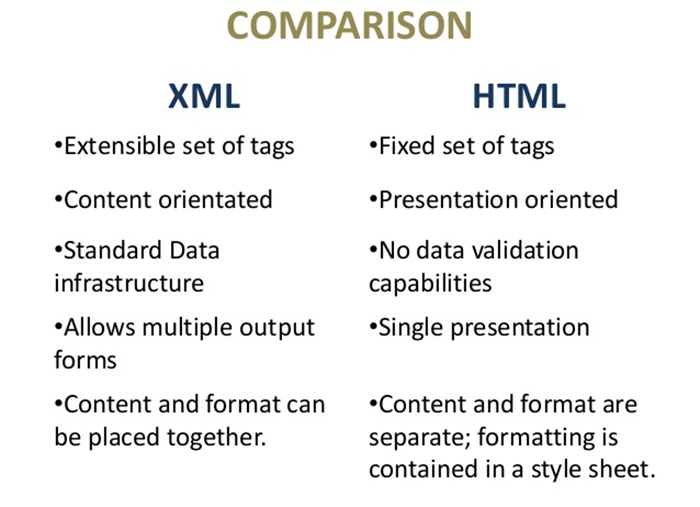

## XML VS JSON
- 가장 큰 XML의 장점은 설명을 달아놓을 수 있음
- 데이터의 범위를 잡아놓는 등
- 단점은 복잡함
- 용량이 좀 더 많음

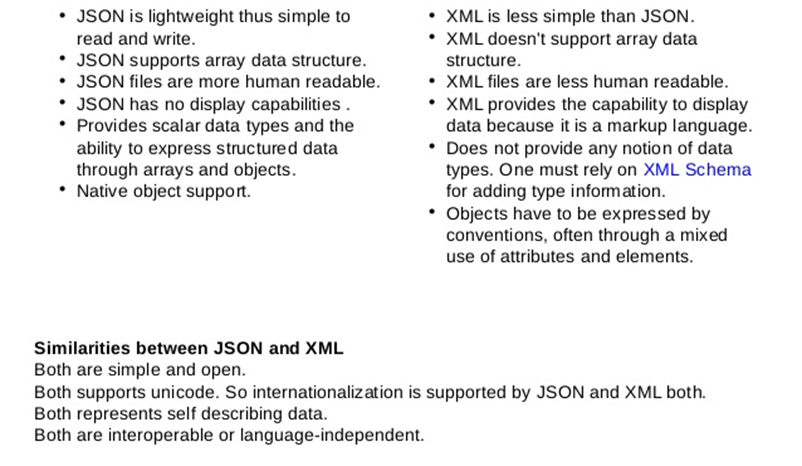

## XML에서 지킬 부분
- utf-8이 기본 encoding
- closing tag
- case sensitive
- properly nested

## XML Tree
- XML documents are formed as element trees.
- An XML tree starts at a root element and branches from the root to child elements
- The terms parent, child, and sibling are used to describe the relationships between elements

## XML 주의사항
- Element names are case-sensitive
- Element names must start with a letter or underscore
- Element names cannot start with the letters xml (or XML, or Xml, etc)
- Element names can contain letters, digits, hyphens, underscores, and periods
- Element names cannot contain spaces

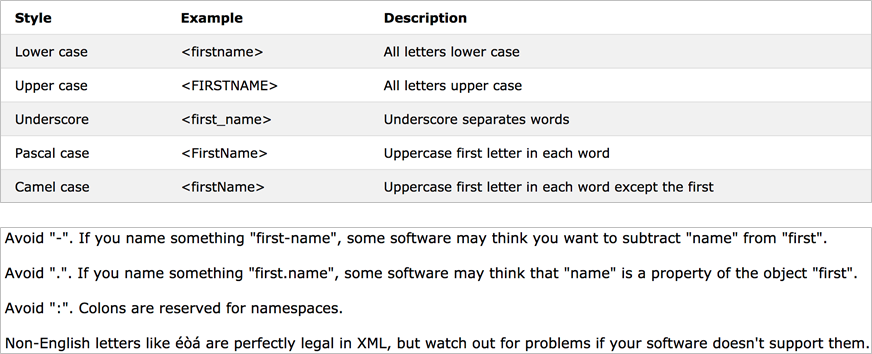

## XML Attributes
- 특정 요소와 연관지을 때 씀
- 내부에 큰 따옴표 사용 가능

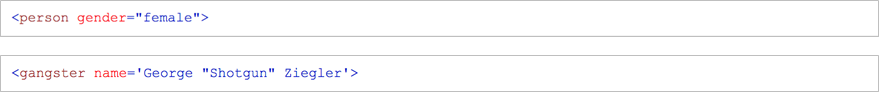

## XPath
- XML에서 요소와 특징으로 탐색하게 해줌

## lxml

In [98]:
from lxml import etree

In [99]:
bookstore = etree.Element("bookstore")

In [100]:
book1 = etree.SubElement(bookstore, 'book')

In [104]:
book2 = etree.SubElement(bookstore, 'book', attrib={"category":"children"})

In [105]:
book1.attrib["category"] = "cooking"

In [107]:
print(etree.tostring(bookstore))

b'<bookstore><book category="cooking"/><book category="childred"/><book category="children"/></bookstore>'


In [129]:
title1 = etree.Element("title", lang="en")

In [130]:
title1.text = "Harry Potter"

In [131]:
etree.dump(title1)

<title lang="en">Harry Potter</title>


In [132]:
book2.append(title1)

In [133]:
print(etree.tostring(bookstore))

b'<bookstore><book category="cooking"/><book category="childred"/><book category="children"><title>Harry Potter</title><title lang="en">Harry Potter</title></book></bookstore>'


In [135]:
etree.SubElement(book1, "title", attrib={"lang":title1.get("lang")})

<Element title at 0x21e36560208>

In [138]:
xmlByte = etree.tostring(bookstore, xml_declaration=True, encoding='utf-8', pretty_print=True)

In [140]:
xmlStr = etree.tounicode(bookstore, pretty_print=True)

In [142]:
print(xmlStr)

<bookstore>
  <book category="cooking">
    <title lang="en"/>
  </book>
  <book category="childred"/>
  <book category="children">
    <title>Harry Potter</title>
    <title lang="en">Harry Potter</title>
  </book>
</bookstore>



In [148]:
xml = etree.XML(etree.tostring(bookstore))

In [150]:
xmlTree = etree.ElementTree(xml)

In [151]:
xmlRoot = xmlTree.getroot()

In [153]:
print(xmlTree.docinfo.xml_version)

1.0


In [152]:
for childNode in xmlRoot:
    print(childNode.tag, childNode.attrib)

book {'category': 'cooking'}
book {'category': 'childred'}
book {'category': 'children'}


---

## 180716

In [2]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote

from lxml import etree

url = 'http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnMesureSidoLIst' 

params = {'ServiceKey' : unquote('9yufdGwfG5nTrm48106s%2B%2FQK%2Bz6byu8kQyqGYX7ywOTcSZz5hKnJG6OSAFPymm3Ei6TrKcsL3Osas1zm4v6HmA%3D%3D'), 
                               'numOfRows' : '10', 
                               'pageSize' : '10',
                               'pageNo' : '1',
                               'startPage' : '1',
                               'sidoName' : '서울', 
                               'searchCondition' : 'DAILY',
                               'ver' : '1.3'}
params = urlencode(params)
params = params.encode("utf-8")

# 위의 service key가 보내는 결과는 달라짐. 이는 byte code로 되어있는 key를 다시 byte code로 바꾸는 것이 된다
request = Request(url, data = params)
response = urlopen(request)
resStr = response.read()

xml = etree.XML(resStr)
xmlTree = etree.ElementTree(xml)
xmlRoot = xmlTree.getroot()
xmlByte = etree.tostring(xmlRoot, xml_declaration=True, encoding='utf-8', pretty_print=True)
xmlStr = etree.tounicode(xmlRoot, pretty_print=True)
print(xmlStr)

<response>
	<header>
		<resultCode>00</resultCode>
		<resultMsg>NORMAL SERVICE.</resultMsg>
	</header>
	<body>
		<items>
			
				<item>
				    <dataTime>2018-07-16 10:00</dataTime>
				    <cityName>강남구</cityName>
				    <so2Value>0.005</so2Value>
				    <coValue>0.3</coValue>
				    <o3Value>0.011</o3Value>
				    <no2Value>0.019</no2Value>
				    <pm10Value>12</pm10Value>
				    <pm25Value>7</pm25Value>
				</item>
			
				<item>
				    <dataTime>2018-07-16 10:00</dataTime>
				    <cityName>강동구</cityName>
				    <so2Value>-</so2Value>
				    <coValue>0.4</coValue>
				    <o3Value>0.008</o3Value>
				    <no2Value>0.020</no2Value>
				    <pm10Value>22</pm10Value>
				    <pm25Value>11</pm25Value>
				</item>
			
				<item>
				    <dataTime>2018-07-16 10:00</dataTime>
				    <cityName>강북구</cityName>
				    <so2Value>0.003</so2Value>
				    <coValue>0.3</coValue>
				    <o3Value>0.015</o3Value>
				    <no2Value>0.022</no2Value>
				    <pm10Value>15</pm10Value>
				  

In [3]:
items = xmlRoot.findall(".//item")

In [4]:
for item in items:
    print(len(item))
    for i in range(len(item)):
        print(item[i].tag, item[i].text)

8
dataTime 2018-07-16 10:00
cityName 강남구
so2Value 0.005
coValue 0.3
o3Value 0.011
no2Value 0.019
pm10Value 12
pm25Value 7
8
dataTime 2018-07-16 10:00
cityName 강동구
so2Value -
coValue 0.4
o3Value 0.008
no2Value 0.020
pm10Value 22
pm25Value 11
8
dataTime 2018-07-16 10:00
cityName 강북구
so2Value 0.003
coValue 0.3
o3Value 0.015
no2Value 0.022
pm10Value 15
pm25Value 6
8
dataTime 2018-07-16 10:00
cityName 강서구
so2Value 0.003
coValue 0.3
o3Value 0.014
no2Value 0.020
pm10Value 18
pm25Value 11
8
dataTime 2018-07-16 10:00
cityName 관악구
so2Value 0.003
coValue 0.3
o3Value 0.017
no2Value 0.019
pm10Value 18
pm25Value 6
8
dataTime 2018-07-16 10:00
cityName 광진구
so2Value 0.007
coValue 0.6
o3Value 0.011
no2Value 0.016
pm10Value 25
pm25Value 15
8
dataTime 2018-07-16 10:00
cityName 구로구
so2Value 0.004
coValue 0.2
o3Value 0.021
no2Value 0.025
pm10Value 26
pm25Value 8
8
dataTime 2018-07-16 10:00
cityName 금천구
so2Value 0.005
coValue 0.3
o3Value 0.014
no2Value 0.018
pm10Value 18
pm25Value 12
8
dataTime 2018-07-16 10

In [5]:
pm10_list = xmlRoot.findall(".//item/pm10Value")

In [6]:
for row in pm10_list:
    print(row.tag, row.text);

pm10Value 12
pm10Value 22
pm10Value 15
pm10Value 18
pm10Value 18
pm10Value 25
pm10Value 26
pm10Value 18
pm10Value 22
pm10Value 24


In [7]:
items = xml.cssselect("item")

In [12]:
pm10ValueList = xml.cssselect("item > pm10Value")

In [13]:
for row in pm10ValueList:
    print(row.tag, row.text)

pm10Value 12
pm10Value 22
pm10Value 15
pm10Value 18
pm10Value 18
pm10Value 25
pm10Value 26
pm10Value 18
pm10Value 22
pm10Value 24
